In [65]:
%matplotlib_svg
import pylab as pl
import numpy as np
from scipy import linalg

In [22]:
from numpy.lib.stride_tricks import as_strided
np.set_printoptions(2)

## 线性代数-linalg

### 解线性方程组

linalg.solve(A, b), 求解Ax=b, 或者 ZX=B, X的每一列和B的每一列一一对应

In [1]:
import numpy as np
from scipy import linalg

m, n = 500, 50
A = np.random.rand(m, m)
B = np.random.rand(m, n)

X1 = linalg.solve(A, B)
X2 = np.dot(linalg.inv(A), B)

print np.allclose(X1, X2)

%timeit linalg.solve(A, B)
%timeit np.dot(linalg.inv(A), B)

True
100 loops, best of 3: 5.87 ms per loop
100 loops, best of 3: 13.3 ms per loop


LU 分解, 将系数矩阵分解成下三角和上三角矩阵有对应的公式

In [8]:
luf = linalg.lu_factor(A)
X3 = linalg.lu_solve(luf, B)

np.allclose(X1, X3)

True

In [4]:
M, N = 1000, 100
)
Ai = linalg.inv(A)
luf = linalg.lu_factor(A)   
%timeit linalg.inv(A)
%timeit np.dot(Ai, B)
%timeit linalg.lu_factor(A)    
%timeit linalg.lu_solve(luf, B) 

10 loops, best of 3: 131 ms per loop
100 loops, best of 3: 9.65 ms per loop
10 loops, best of 3: 52.6 ms per loop
100 loops, best of 3: 13.8 ms per loop


### 最小二乘解

In [12]:
# x,h 中的元素是有顺序的, 本次创建的h与真实的h是倒序关系

x = np.random.standard_normal(4) 
X = as_strided(x, shape=(len(x)-3+1, 3), \
               strides=(x.itemsize, x.itemsize)) 
print x,x.itemsize
print (len(x)-3+1, 3), X

[ 0.13  0.6  -0.73  0.24] 8
(2, 3) [[ 0.13  0.6  -0.73]
 [ 0.6  -0.73  0.24]]


In [13]:
from numpy.lib.stride_tricks import as_strided

def make_data(m, n, noise_scale): #
    np.random.seed(42)
    x = np.random.standard_normal(m) 
    h = np.random.standard_normal(n) 
    y = np.convolve(x, h) 
    yn = y + np.random.standard_normal(len(y)) * noise_scale * np.max(y)
    return x, yn, h
    
def solve_h(x, y, n):      #
    X = as_strided(x, shape=(len(x)-n+1, n), strides=(x.itemsize, x.itemsize)) #❸
    Y = y[n-1:len(x)]      # 选取中间方程组对应的结果
    h = linalg.lstsq(X, Y) #
    return h[0][::-1]      # 运算中的h是倒序排列的

In [19]:
x, yn, h = make_data(1000, 100, 0.4)   
H1 = solve_h(x, yn, 120)
H2 = solve_h(x, yn, 80)

print "Average error of H1:", np.mean(np.abs(H1[:100] - h))
print "Average error of H2:", np.mean(np.abs(h[:80] - H2))

 Average error of H1: 0.301548854044
Average error of H2: 0.295842215834


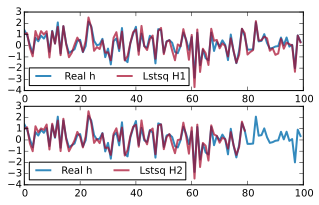

In [28]:
#%figonly=实际的系统参数与最小二乘解的比较
fig, (ax1, ax2) = pl.subplots(2, 1, figsize=(5, 3))
ax1.plot(h, linewidth=2, label=u" Real h")
ax1.plot(H, linewidth=2, label=u"Lstsq H1", alpha=0.7)
ax1.legend(loc="best", ncol=2)
ax1.set_xlim(0, len(H))

ax2.plot(h, linewidth=2, label=u"Real h")
ax2.plot(H2, linewidth=2, label=u"Lstsq H2", alpha=0.7)
ax2.legend(loc="best", ncol=2)
ax2.set_xlim(0, len(H));

### 特征值和特征向量

linalg.eig()函数 计算特征值和特征向量

In [37]:
A = np.array([[1, -0.3], [-0.1, 0.9]])
evalues, evectors = linalg.eig(A)
print "特征值: \n ",evalues,  "\n \n", "特征向量: \n ", evectors

特征值: 
  [ 1.13+0.j  0.77+0.j] 
 
特征向量: 
  [[ 0.92  0.79]
 [-0.4   0.61]]


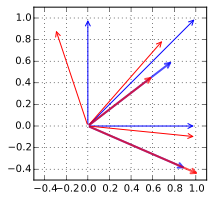

In [40]:
# 线性变换将蓝色箭头变换为红色箭头
points = np.array([[0, 1.0], [1.0, 0], [1, 1]])

# 定义一个画箭头的函数
def draw_arrows(points, **kw):
    props = dict(color="blue", arrowstyle="->")
    props.update(kw)
    for x, y in points:
        pl.annotate("",
                    xy=(x, y), xycoords='data',
                    xytext=(0, 0), textcoords='data',
                    arrowprops=props)

draw_arrows(points) # 01,10,11 三个箭头

# 用A做三个原始向量的线性变换    
draw_arrows(np.dot(A, points.T).T, color="red") 

# 原空间的特征向量
draw_arrows(evectors.T, alpha=0.7, linewidth=2)
#  特征向量的线性变换
draw_arrows(np.dot(A, evectors).T, color="red", alpha=0.7, linewidth=2)    

ax = pl.gca()
ax.set_aspect("equal")
ax.set_xlim(-0.5, 1.1)
ax.set_ylim(-0.5, 1.1)
ax.grid("on");

In [42]:
np.random.seed(42)
t = np.random.uniform(0, 2*np.pi, 60)

alpha = 0.4
a = 0.5
b = 1.0
x = 1.0 + a*np.cos(t)*np.cos(alpha) - b*np.sin(t)*np.sin(alpha)
y = 1.0 + a*np.cos(t)*np.sin(alpha) - b*np.sin(t)*np.cos(alpha)
x += np.random.normal(0, 0.05, size=len(x))
y += np.random.normal(0, 0.05, size=len(y))

(60,)

In [51]:
D = np.c_[x**2, x*y, y**2, x, y, np.ones_like(x)]
# D[:2, :]

array([[ 0.16,  0.08,  0.04,  0.4 ,  0.21,  1.  ],
       [ 2.43,  2.28,  2.15,  1.56,  1.47,  1.  ]])

In [52]:
A = np.dot(D.T, D)
A

array([[ 124.23,  123.6 ,  134.1 ,   90.63,   88.85,   70.27],
       [ 123.6 ,  134.1 ,  154.95,   88.85,   97.71,   67.35],
       [ 134.1 ,  154.95,  188.4 ,   97.71,  115.91,   75.56],
       [  90.63,   88.85,   97.71,   70.27,   67.35,   60.17],
       [  88.85,   97.71,  115.91,   67.35,   75.56,   55.63],
       [  70.27,   67.35,   75.56,   60.17,   55.63,   60.  ]])

In [53]:
C = np.zeros((6, 6))
C[[0, 1, 2], [2, 1, 0]] = 2, -1, 2
C

array([[ 0.,  0.,  2.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [63]:
evalues, evectors = linalg.eig(A, C)     #
evectors

array([[ -5.53e-01+0.j,  -4.79e-01+0.j,   3.70e-01+0.j,  -1.27e-16+0.j,
         -4.93e-18+0.j,  -5.51e-18+0.j],
       [  5.59e-01+0.j,   2.35e-01+0.j,  -8.13e-01+0.j,   3.81e-16+0.j,
         -5.26e-17+0.j,  -6.61e-17+0.j],
       [ -2.27e-01+0.j,   7.77e-02+0.j,   2.60e-01+0.j,  -2.01e-16+0.j,
         -1.97e-17+0.j,   8.82e-17+0.j],
       [  5.46e-01+0.j,   7.31e-01+0.j,   7.37e-02+0.j,   9.19e-01+0.j,
          2.21e-01+0.j,   2.07e-01+0.j],
       [ -1.06e-01+0.j,  -3.73e-01+0.j,   2.99e-01+0.j,   9.58e-03+0.j,
         -2.37e-02+0.j,   9.48e-01+0.j],
       [ -1.45e-01+0.j,  -1.88e-01+0.j,  -1.98e-01+0.j,  -3.94e-01+0.j,
          9.75e-01+0.j,  -2.41e-01+0.j]])

In [66]:
evectors = np.real(evectors)
err = np.mean(np.dot(D, evectors)**2, 0) #
# 6个特征向量(参数组合), 60个数据行, 每个特征向量都对应60个误差, 取平均

# 每个特征向量误差的平均值
p = evectors[:, np.argmin(err) ]         #❸
print p

[-0.55  0.56 -0.23  0.55 -0.11 -0.14]


<matplotlib.contour.QuadContourSet instance at 0x10DB8B20>

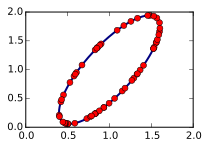

In [74]:
#%figonly=用广义特征向量计算的拟合椭圆
def ellipse(p, x, y):
    a, b, c, d, e, f = p
    return a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

X, Y = np.mgrid[0:2:100j, 0:2:100j]
Z = ellipse(p, X, Y) # 自定义函数ellipse计算椭圆函数的值

pl.figure(figsize=(3,2))
pl.plot(x, y, "ro", alpha=0.5) # 带噪声的椭圆点
pl.contour(X, Y, Z, levels=[0])
# contour 等值线图, 平面投影图, 可以画隐函数的方程
# 只有Z=0时才有值, Z=1,2... 任何数都没有值

### 奇异值分解-SVD

In [66]:
x=pl.imread("fy.jpg")
x.shape

(312, 298, 3)

In [68]:
r, g, b= np.rollaxis(pl.imread("fy.jpg"), 2).astype(float)
img = 0.2989 * r + 0.5870 * g + 0.1140 * b
img.shape

(312, 298)

In [69]:
U, s, Vh = linalg.svd(img)
%C 5 U.shape; s.shape; Vh.shape

 U.shape       s.shape      Vh.shape 
----------     -------     ----------
(312, 312)     (298,)      (298, 298)


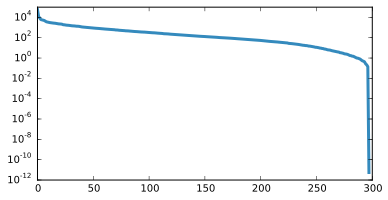

In [70]:
#%fig=按从大到小排列的奇异值
pl.semilogy(s, lw=3);
# pl.plot(s, lw=3);

In [61]:
def composite(U, s, Vh, n):
    return np.dot(U[:, :n], s[:n, np.newaxis] * Vh[:n, :])

print np.allclose(img, composite(U, s, Vh, len(s)))

True


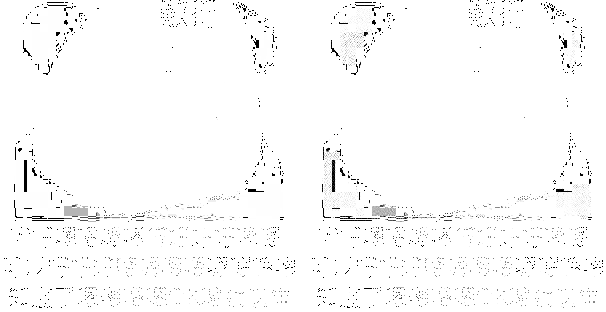

In [73]:
#%fig=原始图像、使用10、20、50个向量合成的图像（从左到右）
img10 = composite(U, s, Vh, 250)
img20 = composite(U, s, Vh, 290)
img50 = composite(U, s, Vh, 200)

%array_image img; img10